# 📊 The Chi‑Squared Distribution (χ²)

The **chi‑squared distribution** is a family of continuous probability distributions that arise naturally whenever you **sum the squares of independent standard normal random variables**. Formally:

$$
X = Z_1^2 + Z_2^2 + \dots + Z_k^2
$$

where each $Z_i \sim N(0,1)$.  
This result is explicitly stated in multiple sources.

---

## 🎛️ Key Parameter: Degrees of Freedom (k)

The distribution is controlled by a single parameter:

- **k = degrees of freedom**  
- It equals the number of squared standard normals being summed.

This parameter determines the **shape**, **mean**, **variance**, and **skewness** of the distribution.

---

## 📐 Shape and Properties

The chi‑squared distribution has several distinctive features:

### ✔️ **Support**
- Only takes values on $[0, \infty)$ — it is **non‑negative** because it is a sum of squares.

### ✔️ **Shape**
- **Right‑skewed**, especially for small $k$.
- As $k$ increases, it becomes more symmetric and approaches a normal distribution (via the central limit theorem).

### ✔️ **Moments**
From standard results:

| Property | Value |
|---------|-------|
| Mean | $k$ |
| Variance | $2k$ |
| Mode | $k - 2$ (for $k \ge 2$) |
| Skewness | $\sqrt{8/k}$ |

---

## 🔗 Relationship to Other Distributions

The chi‑squared distribution is a **special case of the gamma distribution**:

$$
\chi^2(k) \sim \text{Gamma}\left(\alpha = \frac{k}{2},\ \theta = 2\right)
$$

---

## 🧪 Why It Matters in Statistics

The chi‑squared distribution shows up everywhere in inference:

### **1. Goodness‑of‑fit tests**
- Compare observed vs. expected frequencies.

### **2. Tests of independence**
- Contingency tables (e.g., the classic “Are gender and preference independent?”).

### **3. Variance estimation**
- If a sample comes from a normal population, the statistic  
  $$
  \chi^2 = \frac{(n-1)s^2}{\sigma^2}
  $$
  follows a chi‑squared distribution.

### **4. ANOVA and regression**
- Components of sums of squares follow chi‑squared distributions.

---

## 🧠 Intuition (the part that makes it *click*)

Think of the chi‑squared distribution as measuring **total squared deviation** from zero across several independent directions.

- With **1 degree of freedom**, it’s just the square of a single normal variable — very skewed.
- With **many degrees of freedom**, you’re summing many squared deviations, so the distribution smooths out and becomes more symmetric.

It’s fundamentally a **distribution of accumulated evidence** — which is why it underlies so many hypothesis tests.

---

## 📈 Plot

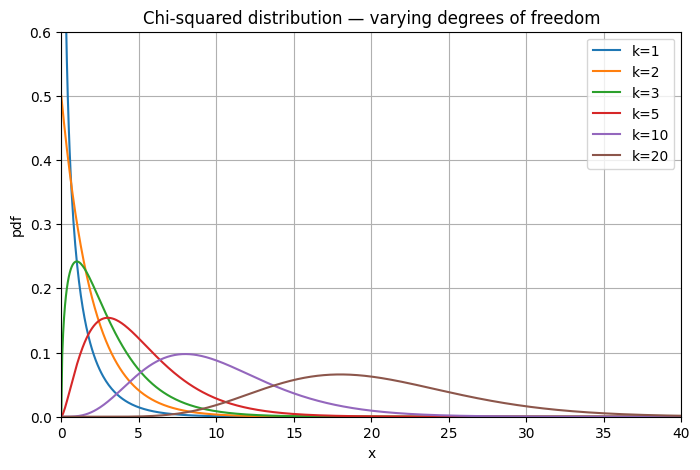

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

dfs = [1, 2, 3, 5, 10, 20]
x_max = max(15, max(dfs) * 3)
x = np.linspace(0, x_max, 1000)

plt.figure(figsize=(8, 5))
for k in dfs:
  plt.plot(x, chi2.pdf(x, k), label=f"k={k}")
plt.xlim(0, 40)
plt.ylim(0, 0.6)
plt.xlabel("x")
plt.ylabel("pdf")
plt.title("Chi-squared distribution — varying degrees of freedom")
plt.legend()
plt.grid(True)
plt.show()

# 📊 Chi‑Square Goodness‑of‑Fit Test  
The **goodness‑of‑fit test** answers a simple but powerful question:

> **Does my observed categorical data match what some model or historical distribution says it *should* look like?**

It’s used when you have **one categorical variable** and want to check whether the observed frequencies differ significantly from expected frequencies under some hypothesized distribution.

---

# 🎯 When You Use It
You use a chi‑square goodness‑of‑fit test when:

- You have **categorical data** (e.g., colors, brands, blood types).
- You have a **hypothesized distribution** (equal proportions, historical proportions, theoretical model, etc.).
- You want to know whether your sample **supports or contradicts** that distribution.

Example: testing whether the proportions of right‑handed, left‑handed, and ambidextrous people match known population percentages.

---

# 🧮 How the Test Works

### **Step 1 — State the hypotheses**
- **H₀ (null):** The observed data follow the specified distribution.  
- **H₁ (alternative):** The observed data do *not* follow that distribution.

### **Step 2 — Compute expected counts**
Expected count for each category:

$$
E_i = n \cdot p_i
$$

where $p_i$ is the hypothesized probability for category $i$.

### **Step 3 — Compute the chi‑square statistic**

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

This measures how far the observed counts deviate from expected counts.

### **Step 4 — Determine degrees of freedom**

$$
df = k - 1
$$

where $k$ is the number of categories.

### **Step 5 — Compare to the chi‑square distribution**


The **null hypothesis** in a chi‑square **goodness‑of‑fit test** is always:

#### **H₀: The observed categorical data follow the specified distribution.**

In other words, the proportions or frequencies in your sample **match** the theoretical, historical, or expected probabilities you’re testing against.

Examples of what H₀ might look like:

- “The die is fair.”  
- “The colors occur in equal proportions.”  
- “The distribution of blood types in this sample matches the known population distribution.”

The alternative hypothesis is:

#### **H₁: The observed data do not follow the specified distribution.**

Using the chi‑square distribution with $df = k - 1$, compute a **p‑value**.
- **Small p‑value:** Observed data differ significantly from expected → reject $H_0$.  
- **Large p‑value:** Observed data are consistent with the expected distribution → accept $H_0$.

---

# ✔️ Assumptions and Conditions

Sources emphasize:

- The categorical variable must have **mutually exclusive categories**.
- Expected counts should generally be **at least 5** for the chi‑square approximation to be valid.
- If expected counts are too small, a **randomization test** is recommended instead.

---

# 🧠 Intuition (why this test works)

The chi‑square statistic is essentially a **scaled measure of total deviation**:

- If observed counts are close to expected → χ² is small → distribution fits well.
- If observed counts differ a lot → χ² is large → distribution does not fit.

It’s a way of quantifying “How surprising is this data if the model were true?”

---

# 🏀 Quick Example (intuitive)

Suppose you think a six‑sided die is fair.  
Expected counts in 60 rolls: 10 per face.



### 1. Set up observed and expected

- **Expected count** for each face: $E_i = 10$  
- **Observed counts**: $O = [4, 8, 11, 15, 12, 10]$



| Face | Observed | χ² |
|------|----------|---|
| 1 | 4 | $ \frac{(4 - 10)^2}{10} = \frac{36}{10} = 3.6 $ |
| 2 | 8 | $ \frac{(8 - 10)^2}{10} = \frac{4}{10} = 0.4 $ |
| 3 | 11 | $ \frac{(11 - 10)^2}{10} = \frac{1}{10} = 0.1 $ |
| 4 | 15 | $ \frac{(15 - 10)^2}{10} = \frac{25}{10} = 2.5 $ |
| 5 | 12 | $ \frac{(12 - 10)^2}{10} = \frac{4}{10} = 0.4 $ |
| 6 | 10 | $ \frac{(10 - 10)^2}{10} = 0 $ |

Sum:

$$
\chi^2 = \sum_{i=1}^6 \frac{(O_i - E_i)^2}{E_i}
$$

$$
\chi^2 = 3.6 + 0.4 + 0.1 + 2.5 + 0.4 + 0 = 7.0
$$

So the test statistic is:

$$
\boxed{\chi^2 = 7.0}
$$

### 3. Degrees of freedom

Number of categories $k = 6$:

$$
df = k - 1 = 6 - 1 = 5
$$

### 4. p‑value

We want:

$$
p = P(\chi^2_5 \ge 7.0)
$$

Using standard chi‑square tables or software, this comes out to approximately:

$$
\boxed{p \approx 0.22}
$$

### 5. Interpretation

At a typical significance level like $\alpha = 0.05$, $p \approx 0.22 > 0.05$, so you **do not reject** the null hypothesis that the die is fair. The deviations you observed are well within what random chance could produce.

In [ ]:
df = 5
chi2_stat = 7.0
p_value = chi2.sf(chi2_stat, df)
print(f"p-value = {p_value:.4f}")

p-value = 0.2206


---

# 📊 Chi‑Square Test of Independence

The **chi‑square test of independence** is a non‑parametric hypothesis test used to determine whether **two categorical variables are related** or whether they are **statistically independent**.

Sources describe it as a test used “to determine whether two categorical variables are related to each other” and “to determine whether or not there is a significant association between two categorical variables”.

---

## 🧠 What It Does  
It checks whether the **distribution of one variable** differs depending on the **levels of another variable**.

Examples:
- Whether **gender is associated with political party preference**  
- Whether different **interventions affect recycling behavior**

---

## 🧮 How It Works (in short)

1. **Set up a contingency table**  
   Counts of observations across combinations of the two categorical variables.

2. **Compute expected counts** under the assumption of independence  
   (i.e., if the variables truly had no relationship).

3. **Calculate the chi‑square statistic**  
   $$
   \chi^2 = \sum \frac{(O - E)^2}{E}
   $$

4. **Degrees of freedom**  
   $$
   df = (r - 1)(c - 1)
   $$

5. **Compare to the chi‑square distribution**  
   A large χ² value suggests the variables are **not independent**.

This logic is described directly in the sources: the test “is used to test for a relationship between two categorical variables” by comparing observed and expected counts in a contingency table.

---

## ✔️ Interpretation  

In a **chi‑square test of independence**, the **null hypothesis** is always:

#### **H₀: The two categorical variables are independent.**  
In other words, **there is no association** or relationship between them.

This means that the distribution of one variable is **the same across all levels** of the other variable. Any differences you see in the contingency table are assumed to be due to **random chance** under the null.

The alternative hypothesis is:

#### **H₁: The two variables are not independent.**  
There *is* an association between them.

- **Small χ² / large p‑value:** No evidence of a relationship → variables appear **independent**.  
- **Large χ² / small p‑value:** Evidence of an association → variables are **not independent**.